## การฉายพิกัด (Projecting) ของ GeoDataFrame

ชุดข้อมูลเขตของกรุงปารีสถูกจัดเก็บในระบบพิกัด EPSG:32631  
เพื่อดูผลลัพธ์จากการนำข้อมูลไปพล็อตหรือคำนวณแบบตรง ๆ โดยไม่แปลงพิกัด  
เราจะพล็อตข้อมูลตามที่เป็นอยู่ก่อน จากนั้นจึงพล็อตเวอร์ชันที่แปลงพิกัดแล้ว

ระบบพิกัดฉายแผนที่มาตรฐานของประเทศฝรั่งเศสคือ  
**RGF93 / Lambert-93** ซึ่งอ้างอิงด้วยรหัส **EPSG:2154**

In [1]:
import geopandas as gpd

districts = gpd.read_file("../../data/raw/paris_districts_utm.geojson")

# Print the CRS information
print(districts.crs)

# Print the first rows of the GeoDataFrame
print(districts.head())

EPSG:32631
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.08 54...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.64 54...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


## การแปลงระบบพิกัดของ GeoDataFrame

ชุดข้อมูลเขตของกรุงปารีสถูกจัดเก็บในระบบพิกัด EPSG:32631  

เพื่อให้เห็นผลลัพธ์ของการนำข้อมูลไปใช้พล็อตหรือคำนวณโดยไม่แปลงระบบพิกัดก่อน  
เราจะเริ่มจากการพล็อตข้อมูลในรูปแบบเดิม จากนั้นจึงพล็อตเวอร์ชันที่ผ่านการแปลงเป็นพิกัดแบบฉายแผนที่ (projected)

ระบบพิกัดแบบฉายมาตรฐานที่ใช้ในประเทศฝรั่งเศสคือ  
**RGF93 / Lambert-93** ซึ่งอ้างอิงด้วยรหัส **EPSG:2154**

EPSG:32631


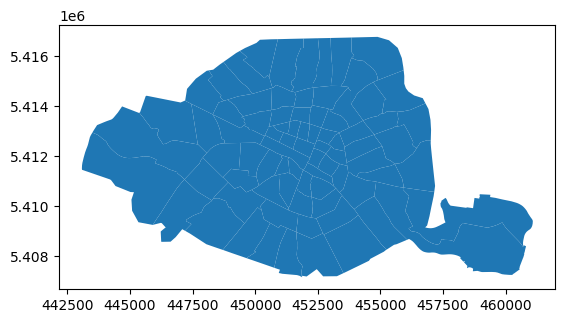

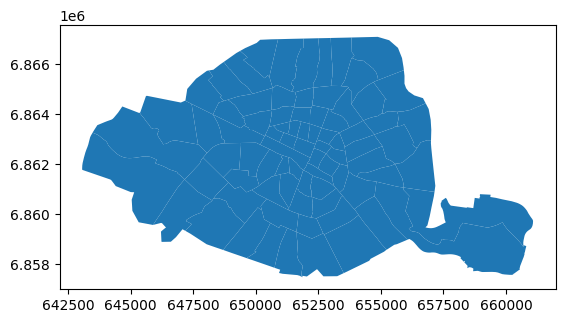

In [2]:
import matplotlib.pyplot as plt
# Print the CRS information
print(districts.crs)

# Plot the districts dataset
districts.plot()
plt.show()

# Convert the districts to the RGF93 reference system
districts_RGF93 = districts.to_crs("EPSG:2154")

# Plot the districts dataset again
districts_RGF93.plot()
plt.show()

## การฉายพิกัดของจุด (Projecting a Point)

ในบทก่อนหน้า เราได้ทำงานกับตำแหน่งของหอไอเฟล โดยให้พิกัดมาในระบบพิกัดแบบฉายแผนที่ (projected coordinate system) เพื่อให้สามารถคำนวณระยะทางได้สะดวก

คราวนี้ เราจะกลับมาที่สถานที่สำคัญแห่งนี้อีกครั้ง และแสดงตำแหน่งของหอไอเฟลในรูปแบบพิกัดภูมิศาสตร์ (geographical coordinates) ดังนี้:

- 48°51′29.6″N, 2°17′40.2″E  

หรือในรูปแบบทศนิยม:
- ละติจูด (latitude) = 48.8584  
- ลองจิจูด (longitude) = 2.2945

In [3]:
# Construct a Point object for the Eiffel Tower
from shapely.geometry import Point
eiffel_tower = Point(2.2945,48.8584)

# Put the point in a GeoSeries with the correct CRS
s_eiffel_tower = gpd.GeoSeries([eiffel_tower], crs="EPSG:4326")

# Convert to other CRS
s_eiffel_tower_projected = s_eiffel_tower.to_crs("EPSG:2154")

# Print the projected point
print(s_eiffel_tower_projected)

0    POINT (648237.302 6862271.682)
dtype: geometry


## การคำนวณระยะทางในระบบพิกัดแบบฉายแผนที่ (Projected CRS)

ตอนนี้เรามีตำแหน่งของหอไอเฟลในระบบพิกัดแบบฉายแผนที่แล้ว จึงสามารถคำนวณระยะทางไปยังจุดอื่น ๆ ได้

ตัวแปร `s_eiffel_tower_projected` จากแบบฝึกหัดก่อนหน้า ซึ่งเก็บวัตถุ `Point` ที่ถูกแปลงพิกัดแล้ว ถูกเตรียมไว้ให้เรียบร้อย และเราจะดึงจุดนั้นออกมาเก็บไว้ในตัวแปร `eiffel_tower`

นอกจากนี้ ยังมี DataFrame ของร้านอาหาร (`restaurants`) ซึ่งใช้พิกัดแบบ WGS84 ถูกโหลดไว้แล้ว

In [14]:
# Extract the single Point
eiffel_tower = s_eiffel_tower_projected[0]
restaurants = gpd.read_file("../../data/processed/paris_restaurants.geojson")
# Ensure the restaurants use the same CRS
restaurants = restaurants.to_crs(s_eiffel_tower_projected.crs)

# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

303.56255387911676


## การแปลงพิกัดเป็น Web Mercator สำหรับใช้งานกับ Web Tiles

ในบทแรก เราได้ทำแบบฝึกหัดเกี่ยวกับการพล็อตตำแหน่งร้านอาหารในปารีส และเพิ่มแผนที่พื้นหลังโดยใช้แพ็กเกจ `contextily`

ปัจจุบัน `contextily` จะสมมติว่าข้อมูลของคุณอยู่ในระบบพิกัด **Web Mercator** (EPSG:3857) ซึ่งเป็นระบบที่บริการแผนที่แบบ web tiles ส่วนใหญ่ใช้

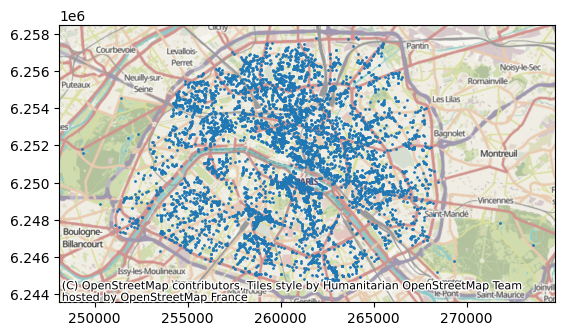

In [18]:
import contextily as ctx
# Convert to the Web Mercator projection
restaurants_webmercator = restaurants.to_crs(epsg=3857)

# Plot the restaurants with a background map
ax = restaurants_webmercator.plot(markersize=1)
ctx.add_basemap(ax)
plt.show()

## การสำรวจชุดข้อมูลการใช้ประโยชน์ที่ดิน (Land Use)

สำหรับแบบฝึกหัดถัดไป เราจะแนะนำชุดข้อมูลใหม่เกี่ยวกับการใช้ประโยชน์ที่ดินในกรุงปารีส  

ข้อมูลการใช้ที่ดินระบุว่าแต่ละพื้นที่ถูกใช้เพื่อกิจกรรมประเภทใด เช่น พื้นที่อยู่อาศัย หรือพื้นที่เพื่อการพักผ่อน

ชุดข้อมูลนี้เป็นข้อมูลแบบหลายเหลี่ยม (polygon) และมีป้ายกำกับ (label) ระบุประเภทการใช้ที่ดินของแต่ละพื้นที่ในปารีส

                       class  \
0               Water bodies   
1  Roads and associated land   
2  Roads and associated land   
3  Roads and associated land   
4  Roads and associated land   

                                            geometry  
0  POLYGON ((3751386.281 2890064.323, 3751395.345...  
1  POLYGON ((3751390.345 2886000, 3751390.345 288...  
2  POLYGON ((3751390.345 2886898.192, 3751390.37 ...  
3  POLYGON ((3751390.345 2887500, 3751390.345 288...  
4  POLYGON ((3751390.345 2888647.357, 3751390.37 ...  


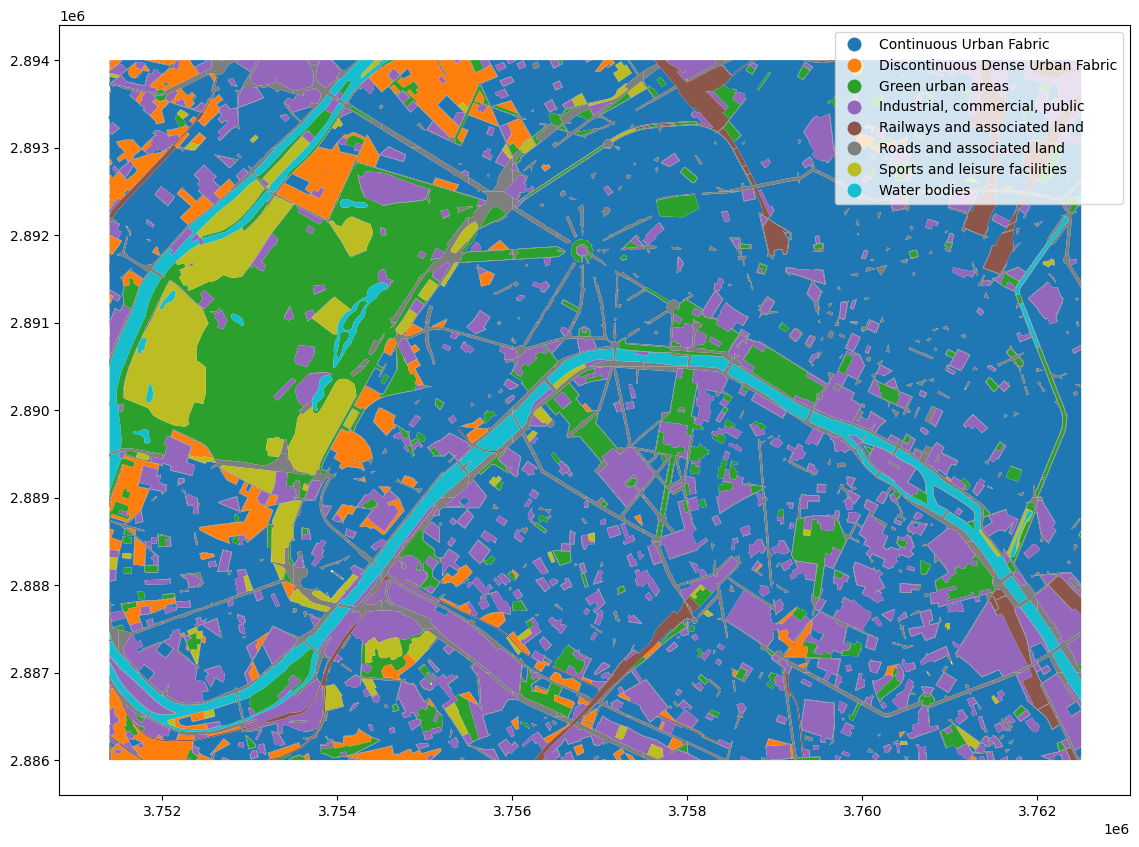

class
Continuous Urban Fabric             45.943090
Discontinuous Dense Urban Fabric     3.657343
Green urban areas                    9.858438
Industrial, commercial, public      13.295042
Railways and associated land         1.935793
Roads and associated land            7.401574
Sports and leisure facilities        3.578509
Water bodies                         3.189706
Name: area, dtype: float64


In [20]:
# Import the land use dataset
land_use = gpd.read_file('../../data/raw/paris_land_use')
print(land_use.head())

# Make a plot of the land use with 'class' as the color
land_use.plot(column='class', legend=True, figsize=(15, 10))
plt.show()

# Add the area as a new column
land_use['area'] = land_use.geometry.area

# Calculate the total area for each land use class
total_area = land_use.groupby('class')['area'].sum() / 1000**2
print(total_area)

## การหาจุดตัดของสองพื้นที่หลายเหลี่ยม (Intersection of Two Polygons)

ในแบบฝึกหัดนี้ เราจะใช้พื้นที่หลายเหลี่ยม (polygon) จำนวน 2 พื้นที่ ได้แก่

- เขต **Muette** ที่ดึงมาจากชุดข้อมูลเขตการปกครอง (districts)
- พื้นที่สีเขียวของเมืองบริเวณ **Boulogne** ซึ่งเป็นสวนสาธารณะขนาดใหญ่ทางตะวันตกของปารีส ที่ดึงมาจากชุดข้อมูลการใช้ที่ดิน (land_use)


In [34]:
land_use = gpd.read_file("../../data/raw/paris_land_use")
districts = gpd.read_file("../../data/raw/paris_districts.geojson").to_crs(land_use.crs)

In [35]:
# extract polygons
land_use['area'] = land_use.geometry.area
park_boulogne = land_use[land_use['class'] == "Green urban areas"].sort_values('area').geometry.iloc[-1]
muette = districts[districts.district_name == 'Muette'].geometry.item()

<Axes: >

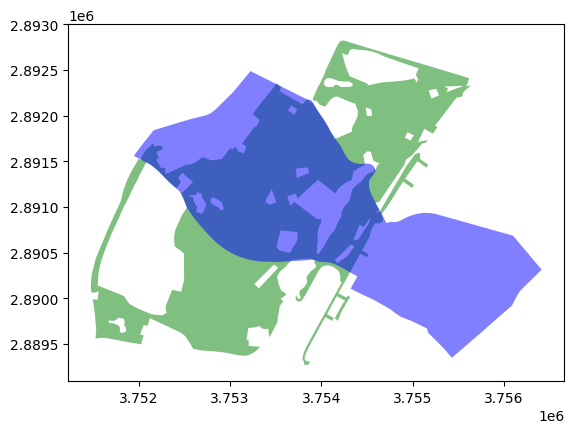

In [40]:
# Plot the two polygons
gpd.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=['green', 'blue'])

In [41]:
# Calculate the intersection of both polygons
intersection = park_boulogne.intersection(muette)

<Axes: >

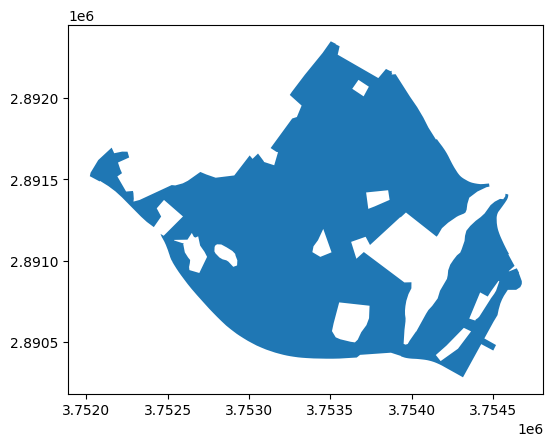

In [42]:
# Plot the intersection
gpd.GeoSeries([intersection]).plot()

In [43]:
# Print proportion of district area that occupied park
print(intersection.area / muette.area)

0.4352082235641901


                       class  \
0               Water bodies   
1  Roads and associated land   
2  Roads and associated land   
3  Roads and associated land   
4  Roads and associated land   

                                            geometry           area  
0  POLYGON ((3751386.281 2890064.323, 3751395.345...  294578.751217  
1  POLYGON ((3751390.345 2886000, 3751390.345 288...    5420.710856  
2  POLYGON ((3751390.345 2886898.192, 3751390.37 ...    2949.568985  
3  POLYGON ((3751390.345 2887500, 3751390.345 288...    8475.451252  
4  POLYGON ((3751390.345 2888647.357, 3751390.37 ...     400.972555  
<class 'shapely.geometry.polygon.Polygon'>


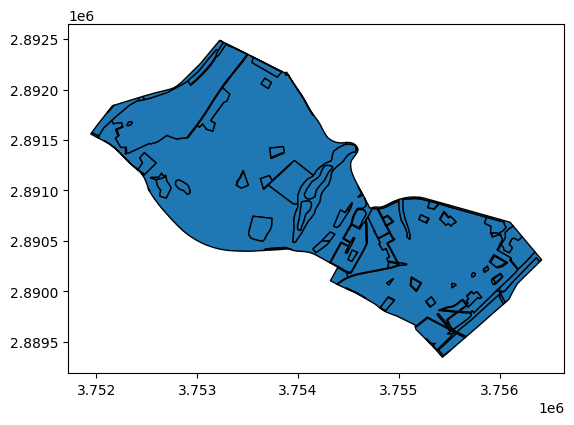

0    POLYGON EMPTY
1    POLYGON EMPTY
2    POLYGON EMPTY
3    POLYGON EMPTY
4    POLYGON EMPTY
dtype: geometry


In [37]:
# Print the land use datset and Notre-Dame district polygon
print(land_use.head())
print(type(muette))

# Calculate the intersection of the land use polygons with Notre Dame
land_use_muette = land_use.intersection(muette)

# Plot the intersection
land_use_muette.plot(edgecolor='black')
plt.show()

# Print the first five rows of the intersection
print(land_use_muette.head())

In [38]:
# Print the first five rows of both datasets
print(land_use.head())
print(districts.head())

# Overlay both datasets based on the intersection
combined = gpd.overlay(land_use, districts, how='intersection')

# Print the first five rows of the result
print(combined.head())

                       class  \
0               Water bodies   
1  Roads and associated land   
2  Roads and associated land   
3  Roads and associated land   
4  Roads and associated land   

                                            geometry           area  
0  POLYGON ((3751386.281 2890064.323, 3751395.345...  294578.751217  
1  POLYGON ((3751390.345 2886000, 3751390.345 288...    5420.710856  
2  POLYGON ((3751390.345 2886898.192, 3751390.37 ...    2949.568985  
3  POLYGON ((3751390.345 2887500, 3751390.345 288...    8475.451252  
4  POLYGON ((3751390.345 2888647.357, 3751390.37 ...     400.972555  
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((3760188.135 2889260.457, 3760188.075...  
1  POL

/Users/master_slave/python_project/basic-geo-spatial-analysis/.venv/lib/python3.11/site-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 4 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
